<a href="https://www.kaggle.com/code/chakrabortyarnab/pycaret-classification-using-automl?scriptVersionId=119509476" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
# import math 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Reading Data
telecom_cust = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')  

# Introduction to AutoML
Machine learning has achieved considerable successes in recent years and an ever-growing number of disciplines rely on it. 

Once upon a time, Automatically trained Machine Learning models are Data Scientist’s dream. 
The typical job of a Data Scientist would be to **Identify — Understand — Acquire — Analyze — Prepare — Train — Evaluate — Convey**. But most of their time will be spent just on Preparing, Training and Evaluating phases alone. 

As more and more businesses turned towards Machine Learning to solve their key problems, Data Scientists were expected to deliver results in a shorter span of time. This has created a demand to automate the key steps in a Data Science project so that, Data Scientists can focus on actual problem than on writing hundreds of lines of code to find the best model. Then came the buzzword, talk of the town **AutoML(Automated Machine Learning)**.

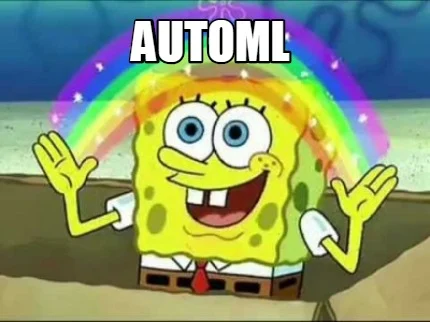

The rapid growth of machine learning applications has created a demand for off-the-shelf machine learning methods that can be used easily and without expert knowledge. We call the resulting research area that targets progressive automation of machine learning AutoML.

## AutoML Libraries
Some of the most of Popular AutoMl libraries are:

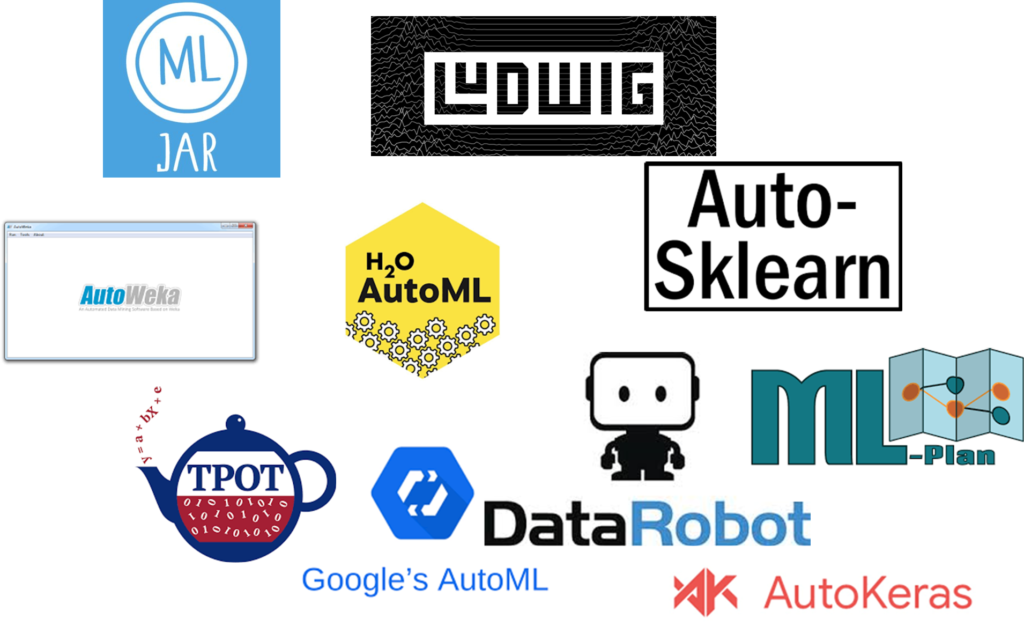

# Pycaret
PyCaret is an open-source low-code machine learning library in Python that aims to reduce the time needed for experimenting with different machine learning models.

### PYCARET IS DEMOCRATIZING MACHINE LEARNING
PyCaret empowers anyone to build low-code, powerful, end-to-end machine learning solutions.

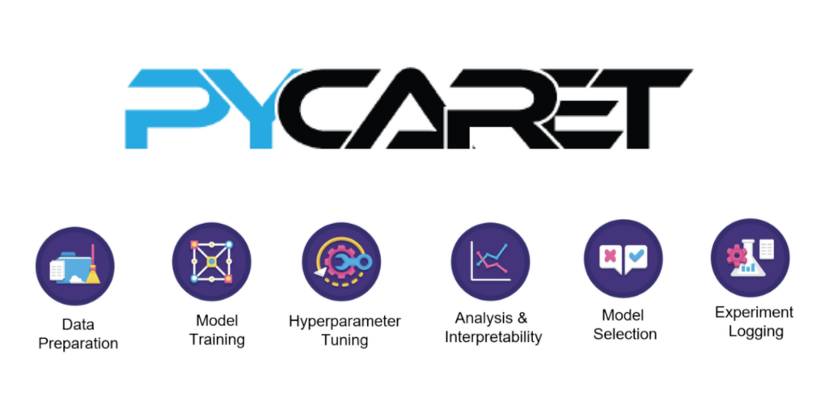

## PyCaret Modules

PyCaret is a modular library arranged into modules and each module representing a machine learning use-case. 

The following modules are avialable:

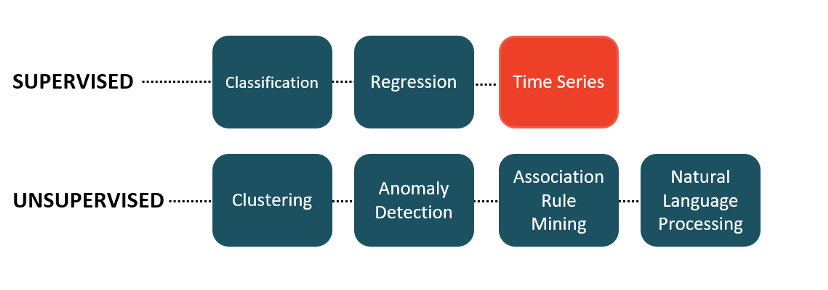)

In this notebook, we will work on the **Classification Module** under Supervised Learning Category

# Classification using Pycaret
* **Dataset - Telco customer Churn**

Each row represents a customer; 
Each column contains customer’s attributes such as demographics, services, the associated cost and the target label 'Churn'.

* **Problem Statement**

Here we need to know: “Is this customer going to leave us?” Yes or No? It is a binary classification task.

**Complete EDA & Modeling using LGBM Link** - https://www.kaggle.com/chakrabortyarnab/telco-churn-eda-optuna-tuned-lgbm-f1-85

## Data Exploration

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Sample Value'] = df.loc[0].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2)
    return summary
resumetable(telecom_cust)

**Action :** Converting data type

In [ ]:
cust=telecom_cust.copy()
#Coverting totalCharges to numerical data type.
cust.TotalCharges = pd.to_numeric(cust.TotalCharges, errors='coerce')

## Target Class Distribution

In [ ]:
print("Customer Churn Rate(%):")
print(round(cust['Churn'].value_counts(normalize=True) * 100,2))

## Distribution of numeric features

In [ ]:
plot , ax = plt.subplots( 1,3 , figsize = (25 , 5))
g = sns.histplot(cust['tenure'] , kde = True , ax = ax[0])
g = sns.histplot(cust['MonthlyCharges'] , kde = True , ax = ax[1])
g = sns.histplot(cust['TotalCharges'] , kde = True , ax = ax[2])

**Normalization :** Tenure, MonthlyCharges and TotalCharges features needs to be normalized as they do not follow a normal distribution.

### Installing PyCaret
It is recommended to create a virtual environment for as it installs dependencies like pandas, NumPy, seaborn, and many more.

In [ ]:
#Upgrading numba for numpy support to smoothly install Pycaret
!pip install numba --upgrade --ignore installed

In [ ]:
!pip install pycaret[full] --ignore-installed

In [ ]:
#Upgrading numba for numpy support to smoothly install Pycaret
!pip install numba --upgrade --ignore installed

In [ ]:
from pycaret.classification import *

## Setting Up
We will set up the following parameters:
* The target variable: **Churn**
* Insignificant features i.e. customer ID
* Normalize the variables
* Fix Target Imbalance
* Remove multicolinearity
* Remove Outliers

For extensive EDA refer: https://www.kaggle.com/code/chakrabortyarnab/telco-churn-eda-optuna-tuned-lgbm-f1-85

For setting up classification parameters refer: https://pycaret.readthedocs.io/en/stable/api/classification.html

In [ ]:
clf1 = setup(data = cust, 
             target = 'Churn',
             ignore_features = ['customerID'],
             train_size=0.8,
             normalize=True,
             normalize_method='minmax',
             fix_imbalance=True,
             remove_multicollinearity=True,
             remove_outliers=True,
             fold=5,
             silent = True)

## Evaluation Metrics

Pycaret provides the following metrics used for comparing model performance in the compare_models() function:
* **Accuracy** is the fraction of correction predictions against the total prediction
    * Accuracy = Correct Predictions / Total Predictions
    
    
* **AUC** known as the Area Under the ROC Curve can be calculated and provides a single score to summarize the plot that can be used to compare models. A no skill classifier will have a score of 0.5, whereas a perfect classifier will have a score of 1.0.

* **Confusion Matrix** is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

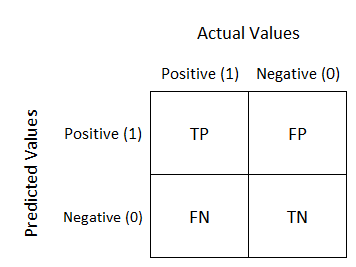


* **Precision** summarizes the fraction of examples assigned the positive class that belong to the positive class.
    * Precision = TruePositive / (TruePositive + FalsePositive)
* **Recall** summarizes how well the positive class was predicted.
    * Recall = TruePositive / (TruePositive + FalseNegative)
* **F1 score** is the harmonic mean of Precision and recall, a single score that seeks to balance both concerns.
    * F-Measure = (2 * Precision * Recall) / (Precision + Recall)
* **Cohen’s Kappa Statistic** is used to measure the level of agreement between two raters or judges who each classify items into mutually exclusive categories.
    * kappa = (Observed agreement - chance agreement) / (1-chance agreement)

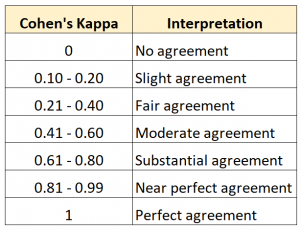

* **MCC** produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.
    
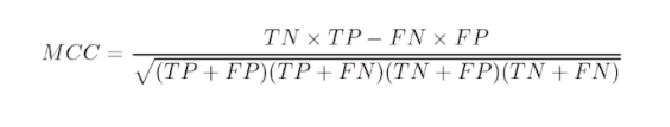

## Model Comparsion & Evaluation

In [ ]:
best_model=compare_models()

**Observation :**
* **Gradient Boosting Classifier** outperforms other models in most of the metrics
* **CatBoost Classifier** has the maximum precision whereas **Quadratic Discriminant Analysis** has the maximum recall
* **Light Gradient Boosting Machine** is almost as accurate as CatBoost Classifier however, it is significantly faster and less computationally expensive.

## Hyperparameter tuning

In [ ]:
tuned_model = tune_model(best_model)

## Plotting Model's performance

In [ ]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

In [ ]:
#Plotting the learning curve
plot_model(estimator = tuned_model, plot = 'learning')

In [ ]:
#plotting the ROC curve
plot_model(estimator = tuned_model, plot = 'auc')

## Decision Boundary

In [ ]:
#plotting decision boundary
plot_model(estimator = tuned_model, plot = 'boundary', use_train_data = True)

## Feature Importance

In [ ]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

## Blending Multiple Models

In [ ]:
#Creating Models
lightgbm  = create_model('lightgbm');       
catboost  = create_model('catboost');          
gbc  = create_model('gbc'); 

#Blending the top 3 models
blend = blend_models(estimator_list=[lightgbm,gbc,catboost])

## Plotting confusion matrix for Blended Model

In [ ]:
plot_model(estimator = blend, plot = 'confusion_matrix')

**Observation :**
By Blending the top 3 models, the precision has improved, however we observe a detoriation in the Recall

# Summary
* PyCaret provides several **data preprocessing and preparation** exercises like imputing missing values, handling outliers, standardizing/normalizing variables, one-hot/ordinal/cardinal encoding, target imbalance and feature selection.
* It provides a robust framework not only to **build multiple ML models** but also evaluate them using a wide set of metrics.
* It offers visuals/plots to **evaluate the model performance** as well as interpret the models.
* Additionally, we can also perform **hyperparameter tuning** and **blend multiple models** to attain highly accuracte models.

# License
References :
* https://pycaret.org
* https://pycaret.readthedocs.io/en/stable/api/classification.html

Copyright (c) 2022 chakrabortyarnab

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.